## 전기차 제조사별 가격, 연료, 주행, 연비, 출력 크롤링

In [60]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import time
import pandas as pd

In [86]:
# 크롬드라이버로 네이버 열기
driver = webdriver.Chrome("C:/ChromeDriver.exe/chromedriver.exe")
driver.get('https://www.naver.com')
time.sleep(2)

# 검색어칸 클릭
driver.find_element_by_id('query').click()
# 검색 단어 입력하기
query_txt = input('크롤링할 키워드는 무엇입니까?')
# ??
element = driver.find_element_by_id('query')
# 검색어칸에 검색어 넣기
element.send_keys(query_txt)
# 검색하기 클릭
driver.find_element_by_class_name('ico_search_submit').click()

C:\Users\user\AppData\Local\Temp\ipykernel_7344\145345972.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver.exe/chromedriver.exe")


- onclick 실행 방법
    - 아래 실행문에 selector 붙여넣기

In [94]:
# 유종 선택
a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div.cm_filter_tap > div.filter_tap_area._filter_tap > div > div > ul > li:nth-child(35) > div > a")
a.send_keys("\n")
time.sleep(2)

# 전기 선택
a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div.cm_filter_tap > div.filter_option > div > div > div.panel_content > div.option_info._filter._scroller > div:nth-child(13) > div > ul > li:nth-child(6) > a")
a.send_keys("\n")
time.sleep(2)

# 적용하기
a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div.cm_filter_tap > div.filter_option > div > div > div.panel_content > div.button_entire.height_50 > a")
a.send_keys("\n")
time.sleep(2)

# 필터링 된 차량 선택하기
a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div._list._panel_wrapper > div:nth-child(1) > div > div:nth-child(1) > div.info_area > strong > a")
a.send_keys("\n")
time.sleep(2)


C:\Users\user\AppData\Local\Temp\ipykernel_7344\3133506974.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div.cm_filter_tap > div.filter_tap_area._filter_tap > div > div > ul > li:nth-child(35) > div > a")
C:\Users\user\AppData\Local\Temp\ipykernel_7344\3133506974.py:7: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div.cm_filter_tap > div.filter_option > div > div > div.panel_content > div.option_info._filter._scroller > div:nth-child(13) > div > ul > li:nth-child(6) > a")
C:\Users\user\AppData\Local\Temp\ipykerne

- 차 정보 가져오기 (가격, 연료, 연비, 출력, 엔진)

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/102.0.5005.115 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="2022 그랜저 하이브리드 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'2022 그랜저 하이브리드\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'2022 그랜저 하이브리드\'의 네이버 통합검색 결과입니다."> <title>2022 그랜저 하이브리드 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.
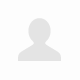
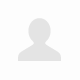
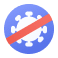
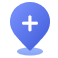
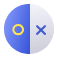
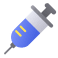

In [24]:
# 페이지 소스 저장
html = driver.page_source
html

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/102.0.5005.115 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="2022 그랜저 하이브리드 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'2022 그랜저 하이브리드'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'2022 그랜저 하이브리드'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>2022 그랜저 하이브리드 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/
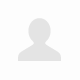
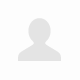
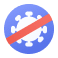
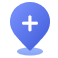
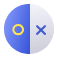
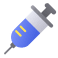

In [25]:
# ??
soup = bs(html, "html.parser")
soup

In [80]:
# 차량 기본정보 가져오기
title_1 = []
contents_1 = []
car_name_1 = []

for i in range(0, 5, 1):
    title = soup.select("div.info_group > dt")
    title_1.append(title[i].text)
    contents = soup.select("div.info_group > dd")
    contents_1.append(contents[i].text.split(' ')[0])

car_name = soup.select("#main_pack > div.sc_new.cs_common_module.case_normal.color_23._cs_car_single._cs_bike_single > div:nth-child(3) > div > div.title_area.type_keep._title_area > h2 > span > strong")
car_name_1.append(car_name[0].text)

print(car_name_1)
print(title_1)
print(contents_1)


['현대 그랜저 하이브리드']
['가격', '연료 ', '연비 ', '출력 ', '엔진 ']
['3,787~4,606만원', '전기,', '복합', '200hp/159hp/38kW', 'I4']


In [95]:
# 뒤로 가기
driver.back()

In [ ]:
# 두번째 차량 선택하기
# 위에 필터링 된 차량 선택하기에서 css패턴을 파악해서 반복문?

a = driver.find_element_by_css_selector("#main_pack > div.sc_new.cs_common_module.case_list.color_1._list_car > div.cm_content_wrap > div > div > div._list._panel_wrapper > div:nth-child(1) > div > div:nth-child(1) > div.info_area > strong > a")
a.send_keys("\n")
time.sleep(2)

# 필터링된 차량이 모두 보이는 페이지에서 href값들을 추출해서 반복해서 실행시켜야 하나?
# 기아 테슬라 등 모두 그렇게 수작업이 필요한가?